# Лабораторная работа 3

Выбрать нелинейное уравнение из 12.3 и найти его корни (для нескольких корней, НЕ ПО УСЛОВИЮ). 

1. Сконструировать МПИ для разных корней. 
2. Отыскать корни методом Ньютона (задавая разные начальные приближения).

In [92]:
import numpy as np               
import matplotlib.pyplot as plt   
import sympy as sym

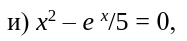

Сперва графически подберем границы корня:

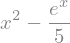

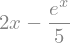

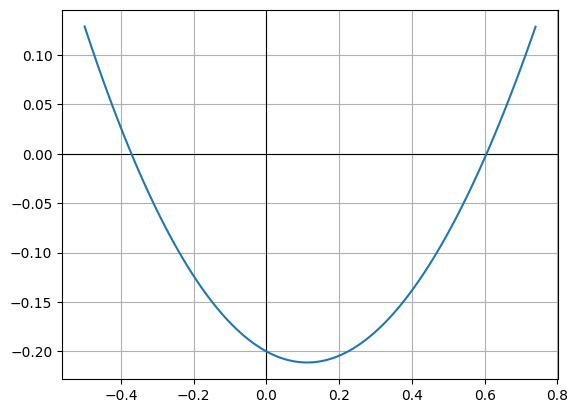

In [96]:
x = sym.Symbol('x')
sym.init_printing()

sym_func = x**2 - sym.exp(x)/5
sym_diff_func = sym.diff(sym_func)
display(sym_func)
display(sym_diff_func)

plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

func = sym.lambdify(x, sym_func, "numpy")
diff_func = sym.lambdify(x, sym_diff_func, "numpy")

x = np.arange(-0.5, 0.75, 0.01)
plt.plot(x, func(x))
plt.grid(True)

In [83]:
def FPI(phi, deriv_phi, x0,  l_lim, r_lim, max_iter=100, eps=1e-7):
    e = np.min([np.abs(x0 - l_lim), np.abs(x0 - r_lim)])
    if np.abs(deriv_phi(e)) >= 1:
        print(f"diff phi ({np.abs(deriv_phi(e))}) >= 1")
        return None, None
        
    x = x0
    diff = []

    for i in range(max_iter):
        if not (l_lim < x and x < r_lim):
            print("Out of limits", x)
            return None, None
        old_x = x
        x = phi(x)

        d = np.abs(x - old_x)
        diff.append(d)

        if d < eps:
            break

    return x, diff

In [85]:
def Newton(f, deriv_f, x0, l_lim, r_lim, max_iter=100, eps=1e-7):
    x = x0
    diff = []

    for i in range(max_iter):
        if not (l_lim < x < r_lim):
            print("Out of limits", x)
            return None, None
        old_x = x
        x = old_x - f(old_x) / deriv_f(old_x)

        d = np.abs(x - old_x)
        diff.append(d)

        if d < eps:
            break

    return x, diff

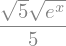

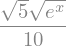

In [126]:
x = sym.Symbol('x')
sym.init_printing()

sym_phi_func = sym.sqrt(sym.exp(x)/5)
sym_phi_diff = sym.diff(sym_phi_func, x)
display(sym_phi_func)
display(sym_phi_diff)
phi = sym.lambdify(x, sym_phi_func,  "numpy")
diff_phi = sym.lambdify(x, sym_phi_diff, "numpy")

Newton: x = 0.605267121315
FPI:    x = 0.605267087436

Подстановка: -2.8599784762661784e-08


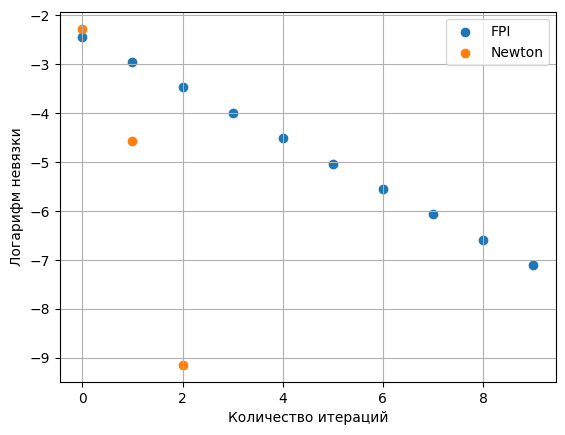

In [ ]:
x, diffNewton = Newton(func, diff_func, 0.6, 0.5, 0.7)
print(f"Newton: x = {x:.12f}")

x, diffFpi = FPI(phi, diff_phi, 0.6, 0.5, 0.7)
print(f"FPI:    x = {x:.12f}")

print("\nПодстановка:", func(x))

plt.scatter(range(len(diffFpi)), np.log10(diffFpi), label='FPI')
plt.scatter(range(len(diffNewton)), np.log10(diffNewton), label='Newton')
plt.xlabel("Количество итераций")
plt.ylabel("Логарифм невязки")
plt.legend()
plt.grid() 

Выбрать систему нелинейных уравнений из 12.4 или 12.6 и решить ее : 

1. Сконструировать МПИ для отыскания корней
2. Методом Ньютона для СНУ.

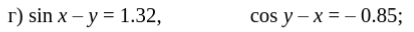

In [88]:
f = lambda x: np.array([
    np.sin(x[0]) - x[1] - 1.32,
    np.cos(x[1]) - x[0] + 0.85,
])

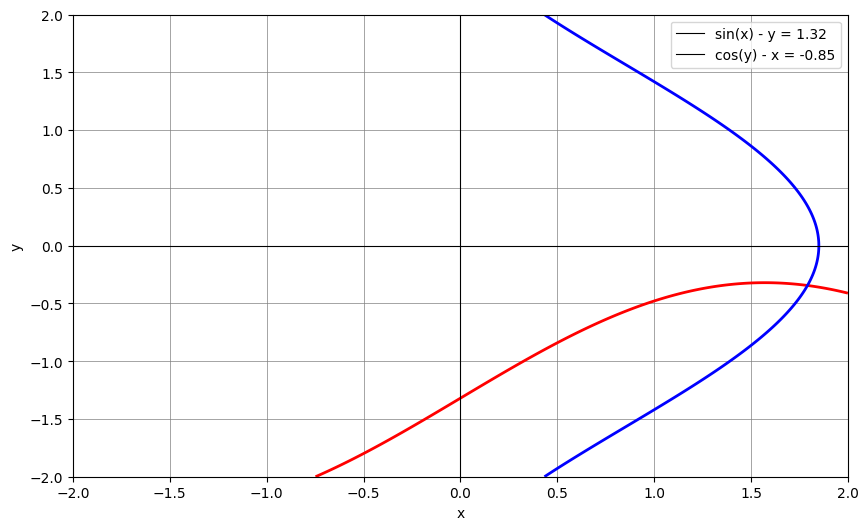

In [106]:
# Создание сетки значений
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)

Z1 = np.sin(X) - Y - 1.32
Z2 = np.cos(Y) - X + 0.85

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z1, levels=[0], colors='r', linestyles='-', linewidths=2)
plt.contour(X, Y, Z2, levels=[0], colors='b', linestyles='-', linewidths=2)

# Настройки графика
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.8)
plt.axvline(0, color='black',linewidth=0.8)
plt.grid(color = 'gray', linestyle = '-', linewidth = 0.5)
plt.legend(['sin(x) - y = 1.32', 'cos(y) - x = -0.85'])
plt.show()

In [116]:
def compute_partial_derivative(f, x, var_index, h):
    dim = len(x)

    vec_h = np.zeros(dim)
    vec_h[var_index] = h

    return (f(x+vec_h) - f(x-vec_h)) / (2*h)

def compute_jacobian(f, x, h):
    dim = len(f(x))
    J = np.zeros((dim, dim))

    for i in range(dim):
        for j in range(dim):
            J[i][j] = compute_partial_derivative(lambda x: f(x)[i], x, j, h[i])
    
    return J

In [ ]:
def FPISystem(phi, x0,  l_lim, r_lim, max_iter=100, eps=1e-7):
    dim = len(phi(x0))
    h = 1e-3 * np.array([np.min([np.abs(x0[i] - l_lim[i]), np.abs(x0[i] - r_lim[i])]) for i in range(dim)])
    x = x0

    J = compute_jacobian(phi, x0, h)
    
    sum_J = np.zeros(dim)
    for i in range(dim):
        for j in range(len(J[i])):
            sum_J[i] += J[i][j]

    max_sum_J = np.max(sum_J)
    if max_sum_J > 1:
        print("Необходимое условие сходимости (максимальная сумма строк Якоби < 1) не выполняется.")
        return None, None
        
    diff = []
    for i in range(max_iter):
        if not (np.all(l_lim < x) and np.all(x < r_lim)):
            print("Out of limits", x)
            return None, None
        old_x = x
        x = phi(x)
        d = np.abs(x - old_x)
        d_norm = np.linalg.norm(d, ord=np.inf)
        diff.append(d_norm)
        if d_norm < eps:
            break

    return x, diff

In [118]:
def NewtonSystem(phi, x0, l_lim, r_lim, max_iter=100, eps=1e-7):
    dim = len(phi(x0))
    h = 1e-3 * np.array([np.min([np.abs(x0[i] - l_lim[i]), np.abs(x0[i] - r_lim[i])]) for i in range(dim)])
    x = x0

    diff = []
    for i in range(max_iter):        
        if not (np.all(l_lim < x) and np.all(x < r_lim)):
            print("Out of limits", x)
            return None, None

        old_x = x
        x = x - np.matmul(np.linalg.inv(compute_jacobian(phi, x, h)), phi(x))
        d = np.abs(x - old_x)
        h = d
        d_norm = np.linalg.norm(d, ord=np.inf)
        diff.append(d_norm)
        
        if d_norm < eps:
            break

    return x, diff

Newton: x = 1.7913386100, y = -0.3442210364
FPI:    x = 1.7913385983, y = -0.3442210457

Подстановка: [1.18072327e-08 8.51026005e-09]


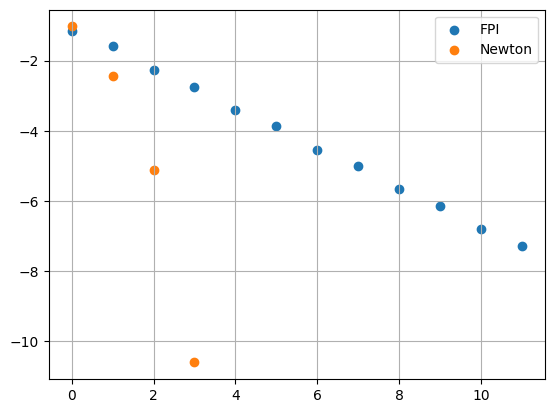

In [129]:
x, diffNewton = NewtonSystem(f, [1.7, -0.4], [1.5, -0.5], [2, -0.2])
print(f"Newton: x = {x[0]:.10f}, y = {x[1]:.10f}")

phi = lambda x: np.array([
    np.cos(x[1]) + 0.85,
    np.sin(x[0]) - 1.32,
])

x, diffFpi = FPISystem(phi, [1.7, -0.4], [1.5, -0.5], [2, -0.2])
print(f"FPI:    x = {x[0]:.10f}, y = {x[1]:.10f}")

print("\nПодстановка:", f(x))

plt.scatter(range(len(diffFpi)), np.log10(diffFpi), label='FPI')
plt.scatter(range(len(diffNewton)), np.log10(diffNewton), label='Newton')
plt.legend()
plt.grid() 